**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
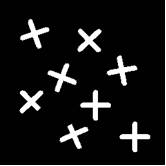
art8lab1.png: 
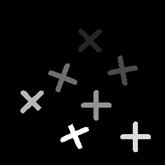
art8lab2.png: 
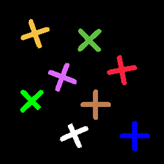
		

10
[  0.   1.   8.  46.  50.  73.  81.  82. 117. 120.]
10
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Text(0.5, 1.0, 'Tamanho da imagem : (256, 256)')

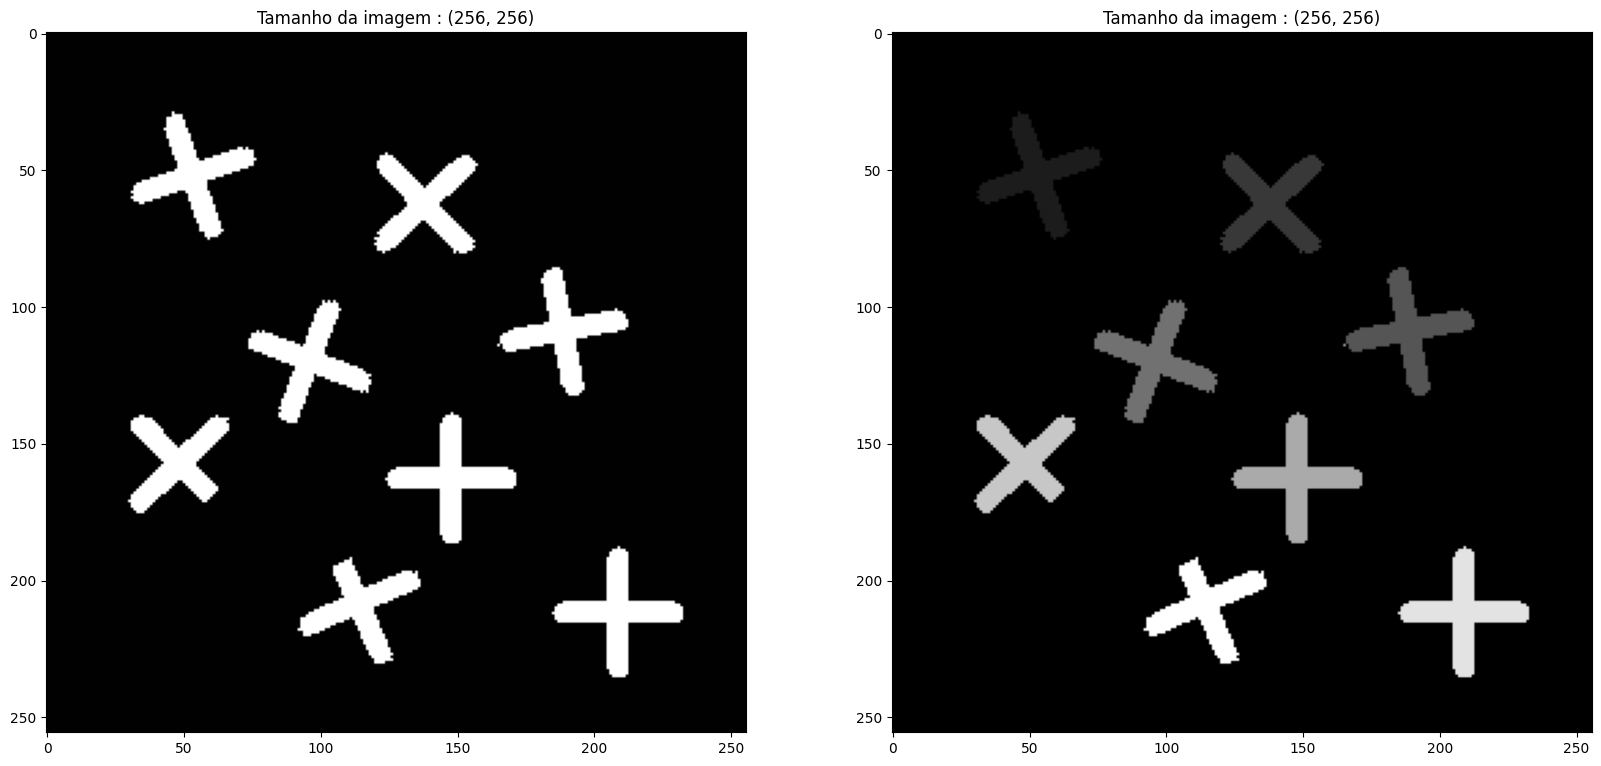

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("art8.png", cv.IMREAD_GRAYSCALE)
linhas, colunas = img.shape
label = np.zeros((linhas,colunas))
newLabel = 1
sameLabel = []

for i in range(1,linhas):
    for j in range(1,colunas):
        if img[i][j] > 100:
            if (label[i-1][j] != 0 and label[i][j-1] != 0) and label[i-1][j] != label[i][j-1]:


                label[i][j] = label[i-1][j]

                sameLabel.append([label[i-1][j], label[i][j-1]])

                # match = False
                # for same in sameLabel:
                #     if np.intersect1d(same,label[i][j-1]) or np.intersect1d(same,label[i-1][j]):
                #         sameLabel.append(np.concatenate((same, [label[i][j-1], label[i-1][j]])))
                #         match = True
                
                # if match == False: sameLabel.append([label[i-1][j], label[i][j-1]])

            elif label[i-1][j] != 0:
                label[i][j] = label[i-1][j]
            elif label[i][j-1] != 0:
                label[i][j] = label[i][j-1]
            else:
                label[i][j] = newLabel
                newLabel = newLabel + 1
        else:
            pass

repetidas = len(sameLabel)
cont = 0
finalSames = []

for same in sameLabel:
    noMatch = True
    for i in range(len(finalSames)):
        if np.intersect1d(same,finalSames[i]).any():
            finalSames[i] = np.concatenate((same, finalSames[i]))
            noMatch = False
    if noMatch:
        finalSames.append(same)


for same in finalSames:
    for element in same:
        label[label == element] = np.min(same)
    
#print(finalSames)
print(len(np.unique(label)))
print(np.unique(label))

intensidades = np.unique(label)
novaIntensidade = 0
novaImg = label

for i in np.sort(intensidades):
    novaImg[label == i] = novaIntensidade
    novaIntensidade = novaIntensidade + 1

print(len(np.unique(novaImg)))
print(np.unique(novaImg))

# colorImg = np.zeros(label.shape,list)
# cor = list(np.random.choice(range(256), size=3))

# for i in np.sort(intensidades):
#     if i != 0: 
#         cor = list(np.random.choice(range(256), size=3))
#         colorImg[label == i] = cor


figura = plt.figure(figsize = (20,20))

figura.add_subplot(2,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Tamanho da imagem : {img.shape}')

figura.add_subplot(2,2,2)
plt.imshow(novaImg, cmap='gray', vmin=0, vmax=np.max(np.unique(novaImg)))
plt.title(f'Tamanho da imagem : {novaImg.shape}')

# colormap = plt.colors.colormap()

# figura.add_subplot(2,2,3)
# plt.imshow(colorImg)
# plt.title(f'Tamanho da imagem : {colorImg.shape}')

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [24]:
# code here

import numpy as np

arr1 = [2]
arr2 = [1, 3]
    
gfg = np.intersect1d(arr1, arr2)

if np.intersect1d(arr1, arr2):
    print (gfg)

C:\Users\proco\AppData\Local\Temp\ipykernel_39864\32625632.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.intersect1d(arr1, arr2):
